In [1]:
import os
from dotenv import load_dotenv

load_dotenv("../../.env")

True

In [2]:
key = os.environ["AZURE_OPENAI_API_KEY"]
endpoint = os.environ["AZURE_OPENAI_ENDPOINT"]

In [3]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.documentintelligence import DocumentIntelligenceClient

credential = AzureKeyCredential(key)
document_analysis_client = DocumentIntelligenceClient(endpoint, credential)

In [4]:
# from pypdf import PdfReader, PdfWriter

# reader = PdfReader("../data/pdf/DX白書2023.pdf")

# # pickup page: 11-16
# writer = PdfWriter()

# for pg in range(10, 16):
#     writer.add_page(reader.pages[pg])

# writer.write("../data/pdf/pickup_dx_paper_2023.pdf")

In [27]:
# pdf_file = "../data/pdf/DX白書2023.pdf"
# pdf_file = "../data/pdf/sample-layout.pdf"
pdf_file = "../data/pdf/pickup_dx_paper_2023.pdf"
pdf_file

'../data/pdf/pickup_dx_paper_2023.pdf'

In [6]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.documentintelligence import DocumentIntelligenceClient
from azure.ai.documentintelligence.models import AnalyzeResult, ContentFormat

In [110]:
document_intelligence_client = DocumentIntelligenceClient(endpoint=endpoint, credential=AzureKeyCredential(key))
with open(pdf_file, "rb") as f:
    poller = document_intelligence_client.begin_analyze_document(
        "prebuilt-layout",
        analyze_request=f,
        pages="4",
        content_type="application/octet-stream",
        output_content_format=ContentFormat.MARKDOWN,
        # api_version="2024-02-29-preview",
    )
result: AnalyzeResult = poller.result()

In [111]:
result

{'apiVersion': '2024-02-29-preview', 'modelId': 'prebuilt-layout', 'stringIndexType': 'textElements', 'content': '<!-- PageHeader="一第1部一第1章一" -->\n\n<!-- PageHeader="図表1-3" -->\n\n企業規模別俯瞰図(売上高別)\n===\n\n|\n|\n|| |\n|| | | |\n|\n|\n|\n|\n|\n|\n|\n| トランスフォーメーションッ     | スタートアップ含め、マッチング | 各企業の業種·ノウハウに応じた | 自社ノウハウ·技術を用いた、 | 業界共通プラットフォーム提供事 || 事業や先進技術ソリューションに | ソリューションの開発·提供がな | 新規ビジネス領域への取組も見ら | 例等あり || よる新規サービス·商品の取組事 | されている | れる | 例あり  ミデジタル     | · 睡眠解析技術とセンサフュージョン | ·介護サービス関係者間での情報共有 | を可能とするデータベース(製造 | · 入出金情報等を基にしたトランザク | ·センサ·AI活用ロボット導入による || 関係者コミュニケーション促進(医 || 技術を活用したSaaS型見守りサー | 業) (No.110) | ションレンディング(金融業,保険 | 療、福祉)(No.95) || ビス(情報通信業)(No.114) | · 水道利用状況データを活用した高齢 | 業)(No. 121) | ·介護タクシー業者と患者のマッチン | · ガス業界内外で利用可能な受発注プ || · 遠隔水位調整サービスを用いた在宅 | 者見守りシステム(製造業)(No.111) | グPFサービスの取組(情報通信業) | ラットフォームサービス展開(電 || 勤務者雇用マッチング事業(情報通 | · 建築業向けMR (複合現実) ソリュー | 気·ガス·熱供給 ·水道業)(No.132) || 信業)(No.140) | ションの開発·導入·販売(建設業) | (No. 138) | · 航空レーザ測深技術を用いた釣り情 | · 物流プラットフォームサービスによ || · 地産地消を実現する青果流通プラッ |

In [112]:
len(result.pages)

1

In [113]:
print(result.content)

<!-- PageHeader="一第1部一第1章一" -->

<!-- PageHeader="図表1-3" -->

企業規模別俯瞰図(売上高別)
===

|
|
|| |
|| | | |
|
|
|
|
|
|
|
| トランスフォーメーションッ     | スタートアップ含め、マッチング | 各企業の業種·ノウハウに応じた | 自社ノウハウ·技術を用いた、 | 業界共通プラットフォーム提供事 || 事業や先進技術ソリューションに | ソリューションの開発·提供がな | 新規ビジネス領域への取組も見ら | 例等あり || よる新規サービス·商品の取組事 | されている | れる | 例あり  ミデジタル     | · 睡眠解析技術とセンサフュージョン | ·介護サービス関係者間での情報共有 | を可能とするデータベース(製造 | · 入出金情報等を基にしたトランザク | ·センサ·AI活用ロボット導入による || 関係者コミュニケーション促進(医 || 技術を活用したSaaS型見守りサー | 業) (No.110) | ションレンディング(金融業,保険 | 療、福祉)(No.95) || ビス(情報通信業)(No.114) | · 水道利用状況データを活用した高齢 | 業)(No. 121) | ·介護タクシー業者と患者のマッチン | · ガス業界内外で利用可能な受発注プ || · 遠隔水位調整サービスを用いた在宅 | 者見守りシステム(製造業)(No.111) | グPFサービスの取組(情報通信業) | ラットフォームサービス展開(電 || 勤務者雇用マッチング事業(情報通 | · 建築業向けMR (複合現実) ソリュー | 気·ガス·熱供給 ·水道業)(No.132) || 信業)(No.140) | ションの開発·導入·販売(建設業) | (No. 138) | · 航空レーザ測深技術を用いた釣り情 | · 物流プラットフォームサービスによ || · 地産地消を実現する青果流通プラッ | (No.126) | 報サービスアプリ展開(学術研究, | る顧客·同業他社連携強化(運輸業、| トフォーム(卸売業,小売業) 
|| · メタバースによるスポーツ観戦空間 郵便業)(No.142) || (No.146)  の提供(情報通信業) (No.137

In [116]:
# for page in result.pages:
#     print("-" * 120)
#     for ldx, line in enumerate(page.lines):
#         print(f"{ldx:03d}: {line.content}")

#     if page.selection_marks is None:
#         continue
#     for smk in page.selection_marks:
#         print(smk.state, f"({smk.confidence})")

In [117]:
# cf. https://techcommunity.microsoft.com/t5/ai-azure-ai-services-blog/build-intelligent-rag-for-multimodality-and-complex-document/ba-p/4118184
from PIL import Image
import fitz  # PyMuPDF


def crop_image_from_pdf_page(pdf_path, page_number, bounding_box) -> Image.Image:
    """
    Crops a region from a given page in a PDF and returns it as an image.

    :param pdf_path: Path to the PDF file.
    :param page_number: The page number to crop from (0-indexed).
    :param bounding_box: A tuple of (x0, y0, x1, y1) coordinates for the bounding box.
    :return: A PIL Image of the cropped area.
    """
    pdx = page_number - 1
    # doc = fitz.open(pdf_path)
    with fitz.open(pdf_path) as doc:
        page = doc.load_page(pdx)

        # Cropping the page. The rect requires the coordinates in the format (x0, y0, x1, y1).
        # The coordinates are in points (1/72 inch).
        bbx = [x * 72 for x in bounding_box]
        rect = fitz.Rect(bbx)
        pix = page.get_pixmap(matrix=fitz.Matrix(300 / 72, 300 / 72), clip=rect)

        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    # doc.close()

    return img

In [53]:
# for idx, style in enumerate(result.styles):
#     print("Document contains {} content".format("handwritten" if style.is_handwritten else "no handwritten"))

page: 4 (1.294, 4.5079, 7.3129, 5.0586)


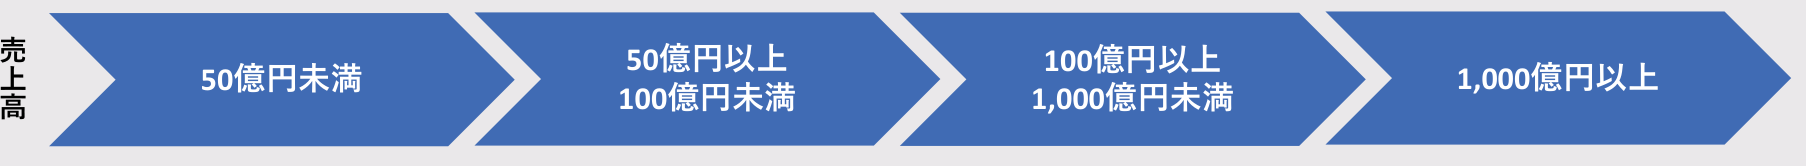

In [118]:
for idx, fg in enumerate(result.figures):
    region = fg["boundingRegions"][0]
    n_page = region["pageNumber"]
    polygon = region["polygon"]
    bounding_box = (polygon[0], polygon[1], polygon[4], polygon[5])
    print(f"page: {n_page}", bounding_box)
    img = crop_image_from_pdf_page(pdf_file, n_page, bounding_box)
    break

img

In [119]:
type(img)

PIL.Image.Image

In [120]:
import base64
import PIL.Image
from io import BytesIO


def encode_image_from_pil(pil_image: PIL.Image.Image):

    buffered = BytesIO()
    pil_image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

In [121]:
from openai import OpenAI


def analyze_image(img: PIL.Image.Image):
    client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))
    base64_image = encode_image_from_pil(img)

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": """
    # 依頼内容
    画像を限りなく正確に読み取ってください

    # 要件

    - 読み取った内容を正確に文章で説明してください
    - 構造的な図であれば、その図を marmaid 記法で追加表現してください

    """,
                    },
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/png;base64,{base64_image}"},
                    },
                ],
            }
        ],
        max_tokens=2048,
    )
    return response.choices[0].message.content

In [122]:
analyzed_text: str = analyze_image(img)
analyzed_text

'この画像は売上高の区分を示す矢印状のチャートです。画像内のテキストは次の通りです。\n\n1. 最初の矢印には「売上高 50億円未満」と書かれています。\n2. 2番目の矢印には「50億円以上 100億円未満」と書かれています。\n3. 3番目の矢印には「100億円以上 1,000億円未満」と書かれています。\n4. 最後の矢印には「1,000億円以上」と書かれています。\n\n以下は、この図をMermaid記法で表現したものです：\n\n```mermaid\ngraph TD;\n    A[売上高] --> B[50億円未満]\n    B --> C[50億円以上<br>100億円未満]\n    C --> D[100億円以上<br>1,000億円未満]\n    D --> E[1,000億円以上]\n```\n\nこのチャートは、売上高の範囲に応じた4つのカテゴリを明確に示しています。'

In [123]:
print(analyzed_text)

この画像は売上高の区分を示す矢印状のチャートです。画像内のテキストは次の通りです。

1. 最初の矢印には「売上高 50億円未満」と書かれています。
2. 2番目の矢印には「50億円以上 100億円未満」と書かれています。
3. 3番目の矢印には「100億円以上 1,000億円未満」と書かれています。
4. 最後の矢印には「1,000億円以上」と書かれています。

以下は、この図をMermaid記法で表現したものです：

```mermaid
graph TD;
    A[売上高] --> B[50億円未満]
    B --> C[50億円以上<br>100億円未満]
    C --> D[100億円以上<br>1,000億円未満]
    D --> E[1,000億円以上]
```

このチャートは、売上高の範囲に応じた4つのカテゴリを明確に示しています。


In [124]:
import re

In [125]:
fig_idx: int = 0
replaced = re.sub(
    f"(<figure>.*?(figures/{fig_idx}).*?</figure>)",
    f"\\1\n=====\n{analyzed_text}\n=====\n",
    result.content,
    flags=(re.MULTILINE | re.DOTALL),
)
print(replaced)

<!-- PageHeader="一第1部一第1章一" -->

<!-- PageHeader="図表1-3" -->

企業規模別俯瞰図(売上高別)
===

|
|
|| |
|| | | |
|
|
|
|
|
|
|
| トランスフォーメーションッ     | スタートアップ含め、マッチング | 各企業の業種·ノウハウに応じた | 自社ノウハウ·技術を用いた、 | 業界共通プラットフォーム提供事 || 事業や先進技術ソリューションに | ソリューションの開発·提供がな | 新規ビジネス領域への取組も見ら | 例等あり || よる新規サービス·商品の取組事 | されている | れる | 例あり  ミデジタル     | · 睡眠解析技術とセンサフュージョン | ·介護サービス関係者間での情報共有 | を可能とするデータベース(製造 | · 入出金情報等を基にしたトランザク | ·センサ·AI活用ロボット導入による || 関係者コミュニケーション促進(医 || 技術を活用したSaaS型見守りサー | 業) (No.110) | ションレンディング(金融業,保険 | 療、福祉)(No.95) || ビス(情報通信業)(No.114) | · 水道利用状況データを活用した高齢 | 業)(No. 121) | ·介護タクシー業者と患者のマッチン | · ガス業界内外で利用可能な受発注プ || · 遠隔水位調整サービスを用いた在宅 | 者見守りシステム(製造業)(No.111) | グPFサービスの取組(情報通信業) | ラットフォームサービス展開(電 || 勤務者雇用マッチング事業(情報通 | · 建築業向けMR (複合現実) ソリュー | 気·ガス·熱供給 ·水道業)(No.132) || 信業)(No.140) | ションの開発·導入·販売(建設業) | (No. 138) | · 航空レーザ測深技術を用いた釣り情 | · 物流プラットフォームサービスによ || · 地産地消を実現する青果流通プラッ | (No.126) | 報サービスアプリ展開(学術研究, | る顧客·同業他社連携強化(運輸業、| トフォーム(卸売業,小売業) 
|| · メタバースによるスポーツ観戦空間 郵便業)(No.142) || (No.146)  の提供(情報通信業) (No.137

In [126]:
# for idx, style in enumerate(result.styles):
#     print("Document contains {} content".format("handwritten" if style.is_handwritten else "no handwritten"))

# for page in result.pages:
#     print("----Analyzing layout from page #{}----".format(page.page_number))
#     print("Page has width: {} and height: {}, measured with unit: {}".format(page.width, page.height, page.unit))

#     for line_idx, line in enumerate(page.lines):
#         words = line.get_words()
#         print(
#             "...Line # {} has word count {} and text '{}' within bounding polygon '{}'".format(
#                 line_idx,
#                 len(words),
#                 line.content,
#                 line.polygon,
#             )
#         )

#         for word in words:
#             print("......Word '{}' has a confidence of {}".format(word.content, word.confidence))

#     for smk in page.selection_marks:
#         print(
#             "...Selection mark is '{}' within bounding polygon '{}' and has a confidence of {}".format(
#                 smk.state,
#                 smk.polygon,
#                 smk.confidence,
#             )
#         )

In [127]:
# for table_idx, table in enumerate(result.tables):
#     print("Table # {} has {} rows and {} columns".format(table_idx, table.row_count, table.column_count))
#     for region in table.bounding_regions:
#         print(
#             "Table # {} location on page: {} is {}".format(
#                 table_idx,
#                 region.page_number,
#                 region.polygon,
#             )
#         )
#     for cell in table.cells:
#         print(
#             "...Cell[{}][{}] has content '{}'".format(
#                 cell.row_index,
#                 cell.column_index,
#                 cell.content,
#             )
#         )
#         for region in cell.bounding_regions:
#             print(
#                 "...content on page {} is within bounding polygon '{}'".format(
#                     region.page_number,
#                     region.polygon,
#                 )
#             )

# print("----------------------------------------")